In [21]:
import os
import numpy as np
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optimizers
from torch.utils.data import DataLoader
from torchvision import datasets
import torchvision.transforms as transforms

In [22]:
np.random.seed(0)
torch.manual_seed(0)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [23]:
class DNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.l1 = nn.Linear(input_dim, hidden_dim)
        self.a1 = nn.Sigmoid()
        self.l2 = nn.Linear(hidden_dim, hidden_dim)
        self.a2 = nn.Sigmoid()
        self.l3 = nn.Linear(hidden_dim, hidden_dim)
        self.a3 = nn.Sigmoid()
        self.l4 = nn.Linear(hidden_dim, output_dim)
        
        self.layers = [self.l1, self.a1,
                       self.l2, self.a2,
                       self.l3, self.a3,
                       self.l4]
        
    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
            
        return x

In [24]:
root = os.path.join('~', '.torch', 'mnist')
transform = transforms.Compose([transforms.ToTensor(),
                               lambda x: x.view(-1)])
mnist_train = datasets.MNIST(root = root, 
                            download = True,
                            train = True,
                            transform = transform)
mnist_test = datasets.MNIST(root = root, 
                            download = True,
                            train = False,
                            transform = transform)
train_dataloader = DataLoader(mnist_train,
                             batch_size=100,
                             shuffle = True)
test_dataloader  = DataLoader(mnist_test,
                             batch_size=100,
                             shuffle = False)

In [25]:
model = DNN(784, 200, 10).to(device)

In [26]:
criterion = nn.CrossEntropyLoss()
optimizer = optimizers.SGD(model.parameters(), lr = 0.05)

def compute_loss(t, y):
    return criterion(y, t)

def train_step(x, t):
    model.train()
    preds = model(x)
    loss = compute_loss(t, preds)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    return loss, preds

epochs = 100
for epoch in range(epochs):
    train_loss = 0.
    train_acc = 0.
    for (x, t) in train_dataloader:
        x, t = x.to(device), t.to(device)
        loss, preds = train_step(x, t)
        train_loss += loss.item()
        train_acc += accuracy_score(t.tolist(), preds.argmax(dim=-1).tolist())
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)
    print('epoch:{}, loss:{:.3}, acc:{:.3f}'.format(epoch+1, train_loss, train_acc))

epoch:1, loss:2.31, acc:0.104
epoch:2, loss:2.31, acc:0.105
epoch:3, loss:2.31, acc:0.107
epoch:4, loss:2.3, acc:0.107
epoch:5, loss:2.3, acc:0.112
epoch:6, loss:2.3, acc:0.117
epoch:7, loss:2.3, acc:0.128
epoch:8, loss:2.28, acc:0.173
epoch:9, loss:2.13, acc:0.270
epoch:10, loss:1.76, acc:0.368
epoch:11, loss:1.39, acc:0.486
epoch:12, loss:1.17, acc:0.564
epoch:13, loss:1.06, acc:0.627
epoch:14, loss:0.925, acc:0.695
epoch:15, loss:0.775, acc:0.757
epoch:16, loss:0.688, acc:0.789
epoch:17, loss:0.637, acc:0.810
epoch:18, loss:0.596, acc:0.826
epoch:19, loss:0.561, acc:0.839
epoch:20, loss:0.53, acc:0.850
epoch:21, loss:0.503, acc:0.859
epoch:22, loss:0.478, acc:0.866
epoch:23, loss:0.456, acc:0.874
epoch:24, loss:0.436, acc:0.879
epoch:25, loss:0.417, acc:0.885
epoch:26, loss:0.4, acc:0.890
epoch:27, loss:0.384, acc:0.893
epoch:28, loss:0.368, acc:0.899
epoch:29, loss:0.354, acc:0.903
epoch:30, loss:0.341, acc:0.906
epoch:31, loss:0.329, acc:0.909
epoch:32, loss:0.318, acc:0.912
epoch

In [27]:
def test_step(x, t):
    model.eval()
    preds = model(x)
    loss = criterrion(preds, t)
    return loss, preds

test_loss = 0.
test_acc = 0.
for (x, t) in test_dataloader:
    x, t = x.to(device), t.to(device)
    loss, preds = train_step(x, t)
    test_loss += loss.item()
    test_acc += accuracy_score(t.tolist(), preds.argmax(dim=-1).tolist())
test_loss /= len(test_dataloader)
test_acc /= len(test_dataloader)
print('test_loss:{:.3f}, test_acc:{:.3f}'.format(test_loss, test_acc))

test_loss:0.118, test_acc:0.967


Label: 4  Pred:  4
Label: 0  Pred:  0
Label: 4  Pred:  4
Label: 7  Pred:  7
Label: 6  Pred:  6
Label: 3  Pred:  3
Label: 2  Pred:  2
Label: 4  Pred:  4
Label: 7  Pred:  7
Label: 6  Pred:  6


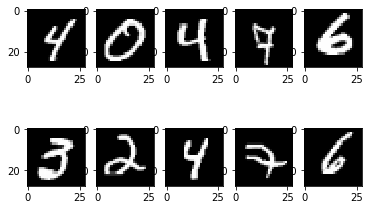

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision
%matplotlib inline

data_iter = iter(train_dataloader)

for i in range(10):
    images, labels = data_iter.next()
    npimg = images[0].numpy()
    npimg = npimg.reshape((28, 28))
    plt.subplot(2,5,i+1)
    plt.imshow(npimg, cmap='gray')
    model.eval()
    images = images.to(device)
    preds = model(images)
    print('Label:', labels.tolist()[0], ' Pred: ',preds.argmax(dim=-1).tolist()[0])